<h1>Emotion Detection</h1>

In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [21]:
import os
import json

In [22]:
def get_moods(data_path):
    moods = []
    for mood_name in os.listdir(data_path):
        moods.append(mood_name)
    return moods

moods = get_moods('/mnt/c/Users/lenovo/Downloads/mood/train')
moods

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [23]:
data_path = '/mnt/c/Users/lenovo/Downloads/mood/train'

# Get first 100 images from each mood
train_data = {}
for mood in moods:
    mood_path = os.path.join(data_path, mood)
    images = os.listdir(mood_path)
    train_data[mood] = [
        os.path.join(mood_path, image) for image in images[:1000]
    ]

data_path = '/mnt/c/Users/lenovo/Downloads/mood/validation'

val_data = {}
for mood in moods:
    mood_path = os.path.join(data_path, mood)
    images = os.listdir(mood_path)
    val_data[mood] = [
        os.path.join(mood_path, image) for image in images[:100]
    ]

In [24]:
from pathlib import Path

import os
import cv2
import numpy as np
import mediapipe as mp

# Load the mediapipe holistic model
mp_holistic = mp.solutions.holistic

# Initialize the holistic model
holistic = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

def get_facial_landmarks(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = holistic.process(image_rgb)

    if results.face_landmarks is None:
        return None

    return np.array([
        [
            landmark.x,
            landmark.y,
            landmark.z
        ] for landmark in results.face_landmarks.landmark
    ])

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shar

In [ ]:
X_train = []
y_train = []

from tqdm.auto import tqdm

for mood, images in tqdm(list(train_data.items()), desc='Processing moods'):
    for image_path in tqdm(images, desc='Processing images for {}'.format(mood)):
        landmarks = get_facial_landmarks(image_path)
        if landmarks is not None:
            X_train.append(landmarks.reshape(-1))
            y_train.append(mood)
        else:
            print('No face detected in', image_path)

# Save the training data
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

Processing moods:   0%|          | 0/7 [00:00<?, ?it/s]

Processing images for angry:   0%|          | 0/1000 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10069.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/1015.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/1016.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10167.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10178.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10192.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10196.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10202.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10240.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10242.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10250.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10385.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/angry/10397.jpg
N

Processing images for disgust:   0%|          | 0/436 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/11971.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/13458.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/14680.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/14685.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/18269.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/20103.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/2151.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/2163.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/24576.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/26002.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/2625.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/disgust/2795.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/t

Processing images for fear:   0%|          | 0/1000 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10010.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10015.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10149.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10279.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/1036.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10582.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/1063.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10749.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10822.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10869.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/10951.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/11099.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/fear/11423.jpg
No face detect

Processing images for happy:   0%|          | 0/1000 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/10228.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/10258.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/10617.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/10838.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/10930.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/11244.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/11282.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/11621.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/11861.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/1187.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/12167.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/12424.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/happy/12426.jpg


Processing images for neutral:   0%|          | 0/1000 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/10130.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/10143.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/10219.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/1054.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/10569.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/10775.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/10776.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/11434.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/11469.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/11676.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/11780.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/neutral/11789.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/moo

Processing images for sad:   0%|          | 0/1000 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10070.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10132.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10165.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10405.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10454.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10519.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10553.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10657.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10901.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10949.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10952.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10985.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/sad/10999.jpg
No face detected in /mnt/

Processing images for surprise:   0%|          | 0/1000 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/10580.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/10628.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/11757.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/12219.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/12342.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/13988.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/14231.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/14380.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/14687.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/14886.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/15019.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/train/surprise/15049.jpg
No face detected in /mnt/c/Users/lenovo/

In [30]:
X_val = []
y_val = []

for mood, images in tqdm(list(val_data.items()), desc='Processing moods'):
    for image_path in tqdm(images, desc='Processing images for {}'.format(mood)):
        landmarks = get_facial_landmarks(image_path)
        if landmarks is not None:
            X_val.append(landmarks.reshape(-1))
            y_val.append(mood)
        else:
            print('No face detected in', image_path)

# Save the validation data
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)

Processing moods:   0%|          | 0/7 [00:00<?, ?it/s]

Processing images for angry:   0%|          | 0/100 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/angry/10065.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/angry/10371.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/angry/11096.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/angry/12352.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/angry/13167.jpg


Processing images for disgust:   0%|          | 0/100 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/disgust/10053.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/disgust/15110.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/disgust/16264.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/disgust/21851.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/disgust/23876.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/disgust/3521.jpg


Processing images for fear:   0%|          | 0/100 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/10029.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/10043.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/10099.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/10189.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/11416.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/11471.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/11816.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/12676.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/fear/12891.jpg


Processing images for happy:   0%|          | 0/100 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/happy/10023.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/happy/10456.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/happy/10468.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/happy/10480.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/happy/10792.jpg


Processing images for neutral:   0%|          | 0/100 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/neutral/11448.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/neutral/12289.jpg


Processing images for sad:   0%|          | 0/100 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/10004.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/10031.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/10386.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/10423.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/10655.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/1078.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/11209.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/11295.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/1148.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/115.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/11523.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/sad/11626.jpg
No face detected in /mnt/c/Users/lenovo/Down

Processing images for surprise:   0%|          | 0/100 [00:00<?, ?it/s]

No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/surprise/10755.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/surprise/10768.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/surprise/11418.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/surprise/11786.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/surprise/12086.jpg
No face detected in /mnt/c/Users/lenovo/Downloads/mood/validation/surprise/12463.jpg


In [1]:
import numpy as np

# Load the training data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

# Load the validation data
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

## Train Model

<Axes: >

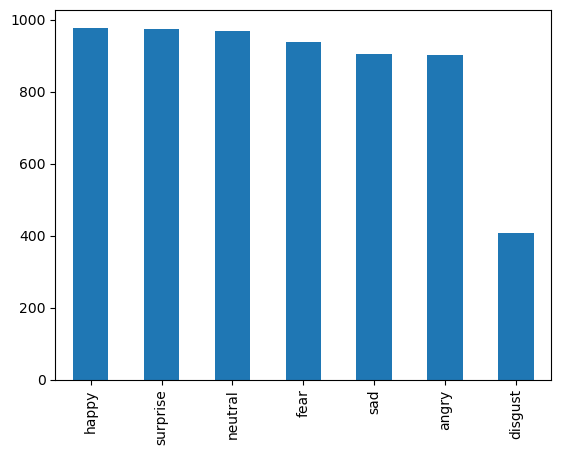

In [3]:
import pandas as pd

# Visualize label distribution
pd.Series(y_train).value_counts().plot(kind='bar')

<Axes: >

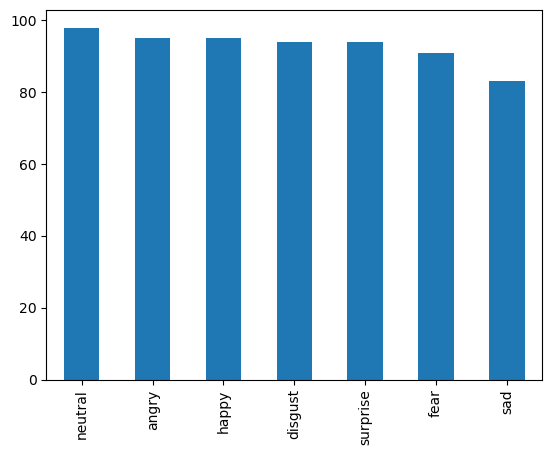

In [4]:
pd.Series(y_val).value_counts().plot(kind='bar')

In [ ]:
BINARY = False

In [ ]:
# Filter only happy and sad images
X_train_filtered = []
y_train_filtered = []

for i, mood in enumerate(y_train):
    if mood in ['happy', 'sad']:
        X_train_filtered.append(X_train[i])
        y_train_filtered.append(mood)


X_val_filtered = []
y_val_filtered = []

for i, mood in enumerate(y_val):
    if mood in ['happy', 'sad']:
        X_val_filtered.append(X_val[i])
        y_val_filtered.append(mood)

if BINARY:
    X_train = X_train_filtered
    y_train = y_train_filtered
    X_val = X_val_filtered
    y_val = y_val_filtered


In [11]:
# Train SVM classifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# Initialize the classifier
clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC())
])

# Train the classifier
clf.fit(
    X_train,
    y_train
)

Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', SVC())])

In [12]:
from sklearn.metrics import classification_report

# Predict the validation data
y_pred = clf.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       angry       0.27      0.19      0.22        95
     disgust       0.50      0.06      0.11        94
        fear       0.17      0.18      0.17        91
       happy       0.64      0.68      0.66        95
     neutral       0.31      0.57      0.40        98
         sad       0.34      0.33      0.33        83
    surprise       0.52      0.62      0.56        94

    accuracy                           0.38       650
   macro avg       0.39      0.38      0.35       650
weighted avg       0.39      0.38      0.35       650



In [ ]:
# Save the classifier
import pickle

model_name = (
    'models/binary_mood_detection.pkl' 
    if BINARY 
    else 'models/mood_detection.pkl'
)

with open(model_name, 'wb') as f:
    pickle.dump(clf, f)